### IRIS dataset analysis and exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.tools.plotting import scatter_matrix

In [2]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
#Load Iris Dataset
data = pd.read_csv('/Users/ashutosh/datasets/Iris/iris.csv')

In [4]:
data.shape

(150, 5)

In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [8]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

### Plots and Vizualizations

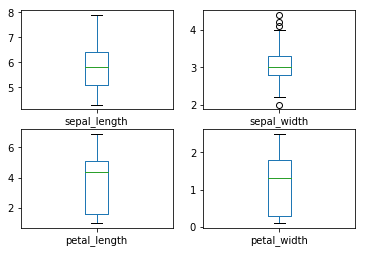

In [9]:
# Box Plots for numeric variables
data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

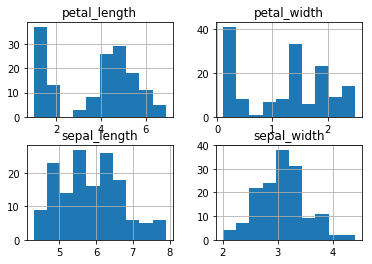

In [10]:
data.hist()
plt.show()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


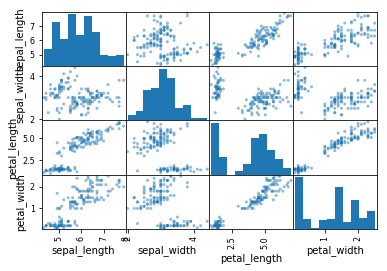

In [11]:
#Scatter Plot
scatter_matrix(data)
plt.show()

#### Using Seaborn for Vizualization

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


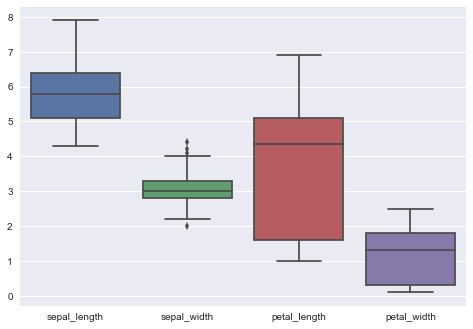

In [12]:
import seaborn as sns
sns.boxplot(data)


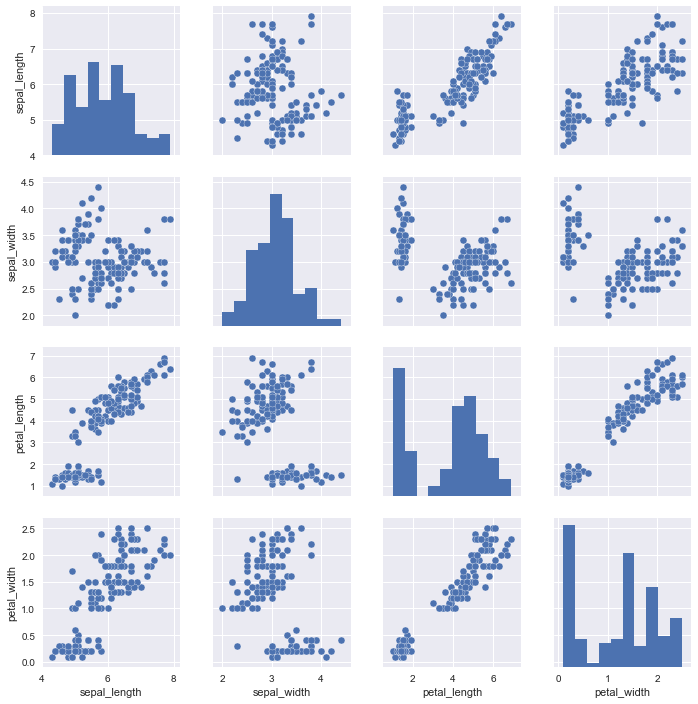

In [13]:
sns.pairplot(data)

## Algorithms

In [14]:
#Create a validation set
array = data.values
X= array[:,0:4]
y = array[:,4]
validation_size = 0.2
seed = 282013
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = validation_size, random_state = seed)

In [15]:
print(X_train.shape)
print(X_val.shape)

(120, 4)
(30, 4)


#### Spot Check Algorithms

In [16]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [17]:
#Evaluate each model in turn
results=[]
names=[]
for name,model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.975000 (0.053359)
LDA: 0.991667 (0.025000)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.958333 (0.067185)
SVM: 0.983333 (0.033333)


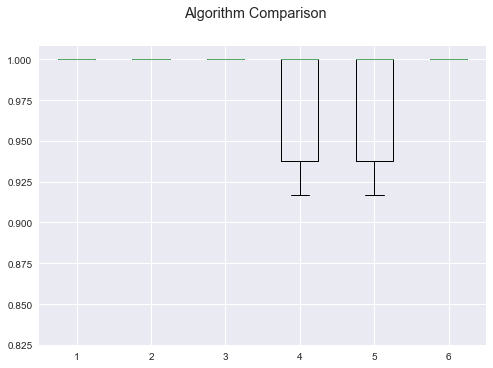

In [18]:
#Compare Algorithms
fig = plt.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [19]:
#Make Predictions
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_val)
print(accuracy_score(y_val, predictions))
print(confusion_matrix(y_val, predictions))
print(classification_report(y_val, predictions))

0.866666666667
[[ 7  0  0]
 [ 0  6  1]
 [ 0  3 13]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         7
 versicolor       0.67      0.86      0.75         7
  virginica       0.93      0.81      0.87        16

avg / total       0.88      0.87      0.87        30



In [24]:
#MAke Predictions Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_val)
print(accuracy_score(y_val, pred_lr))
print(confusion_matrix(y_val, pred_lr))
print(classification_report(y_val, pred_lr))

ValueError: Solver liblinear does not support a multinomial backend.